# Gray Scale 

In [ ]:
#|eval: false
from Cloud2DImageConverter import data
from Cloud2DImageConverter import spherical_projection as sp
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Carregando os dados

In [ ]:
#|eval: false
point_cloud = data.load_all_data("../point_clouds/semantic_kitti")

Extraindo os valores da projeção de um único frame

In [ ]:
#|eval: false
reflec, depth, mask = sp.spherical_projection(point_cloud[0])
mask = sp.colored_matrix_with_label(mask)

Exibindo um recorte 5x5 da matriz de reflectância gerada pela projeção

In [ ]:
#|eval: false
print(reflec.shape)
reflec[20:25, 500:505]

(64, 1024)


array([[0.23999999, 0.19      , 0.30000001, 0.17      , 0.16      ],
       [0.34      , 0.34      , 0.18000001, 0.31999999, 0.2       ],
       [0.20999999, 0.30000001, 0.13      , 0.2       , 0.18000001],
       [0.17      , 0.18000001, 0.30000001, 0.2       , 0.2       ],
       [0.19      , 0.23      , 0.20999999, 0.20999999, 0.2       ]])

Normaliza a matriz resultante da projeção para valores entre 0 e 255, e converte todos para inteiros.

In [ ]:
#|eval: false
reflec_norm = ((reflec - reflec.min()) / (reflec.max() - reflec.min())) * 255
reflec_norm = reflec_norm.astype(np.uint8)

depth_norm = ((depth - depth.min()) / (depth.max() - depth.min())) * 255
depth_norm = depth_norm.astype(np.uint8)

Exibindo um recorte 5x5 da matriz de reflectância após a normalização min max e trazendo pra escala de 0 a 255

In [ ]:
#|eval: false
print(reflec_norm.shape)
reflec_norm[20:25, 500:505]

(64, 1024)


array([[61, 48, 77, 43, 41],
       [87, 87, 46, 82, 51],
       [54, 77, 33, 51, 46],
       [43, 46, 77, 51, 51],
       [48, 59, 54, 54, 51]], dtype=uint8)

numero de canais: 1


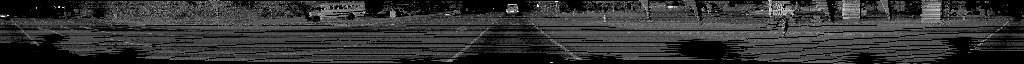

In [ ]:
#|eval: false
reflec_img = Image.fromarray(reflec_norm)
print(f"numero de canais: {len(reflec_img.mode)}")
reflec_img

numero de canais: 1


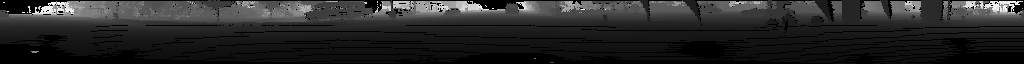

In [ ]:
#|eval: false
depth_img = Image.fromarray(depth_norm)
print(f"numero de canais: {len(depth_img.mode)}")
depth_img

Criando uma nova imagem com 3 canais, sendo o eles reflectância, profundidade e uma imagem preta. 

In [ ]:
#|eval: false
#black_matrix = np.zeros((64, 1024), dtype=np.uint8)
#final_matrix = np.dstack((np.array(reflec_img), np.array(depth_img), black_matrix))
final_matrix = np.dstack((np.array(reflec_img), np.array(depth_img)))
final_matrix.shape

(64, 1024, 2)

modo: LA
numero de canais: 2


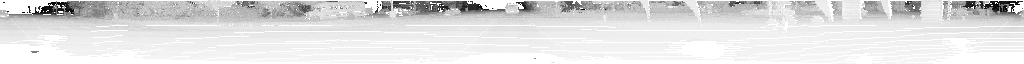

In [ ]:
#|eval: false
final_img = Image.fromarray(final_matrix)
print(f"modo: {final_img.mode}\nnumero de canais: {len(final_img.mode)}")
final_img

# No Changes

In [ ]:
#|eval: false
from Cloud2DImageConverter import data
from Cloud2DImageConverter import spherical_projection as sp
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
#|eval: false
point_cloud = data.load_all_data("../point_clouds/semantic_kitti")

In [ ]:
#|eval: false
reflec, depth, mask = sp.spherical_projection(point_cloud[0])
mask = sp.colored_matrix_with_label(mask)

In [ ]:
#|eval: false
reflec[20:25, 500:505]

array([[0.23999999, 0.19      , 0.30000001, 0.17      , 0.16      ],
       [0.34      , 0.34      , 0.18000001, 0.31999999, 0.2       ],
       [0.20999999, 0.30000001, 0.13      , 0.2       , 0.18000001],
       [0.17      , 0.18000001, 0.30000001, 0.2       , 0.2       ],
       [0.19      , 0.23      , 0.20999999, 0.20999999, 0.2       ]])

In [ ]:
#|eval: false
reflec_img = Image.fromarray(reflec)
print(f"numero de canais: {len(reflec_img.mode)}")
reflec_img

numero de canais: 1


<PIL.Image.Image image mode=F size=1024x64>

In [ ]:
#|eval: false
depth_img = Image.fromarray(depth)
print(f"numero de canais: {len(depth_img.mode)}")
depth_img

numero de canais: 1


<PIL.Image.Image image mode=F size=1024x64>

In [ ]:
#|eval: false
black_matrix = np.zeros((64, 1024), dtype=np.uint8)
final_matrix = np.dstack((np.array(reflec_img), np.array(depth_img), black_matrix))
final_matrix.shape

(64, 1024, 3)

In [ ]:
#|eval: false
final_matrix[:,:,0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#|eval: false
final_img = Image.fromarray(final_matrix)
print(f"numero de canais: {len(final_img.mode)}")
final_img.show()

# Segmentation Mask

**Save Info**
* pkl: 1.2 MB
* npy: 1.5 MB
* h5: 1.5 MB
* png: 70 KB

In [ ]:
#|eval: false
from Cloud2DImageConverter import data
from Cloud2DImageConverter import spherical_projection as sp
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Carregando os dados

In [ ]:
#|eval: false
point_cloud = data.load_all_data("../point_clouds/semantic_kitti")
reflec, depth, mask = sp.spherical_projection(point_cloud[0], 3.0, -25.0, 1024, 64)
colored_mask = sp.colored_matrix_with_label(mask)

In [ ]:
#|eval: false
print(type(mask))
mask[20:25, 500:505]

<class 'numpy.ndarray'>


array([[40., 40., 40., 40., 40.],
       [40., 40., 40., 40., 40.],
       [40., 40., 40., 40., 40.],
       [40., 40., 40., 40., 40.],
       [40., 40., 40., 40., 40.]])

In [ ]:
#|eval: false
colored_mask[:,:,0][20:25, 500:505]

array([[255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255]], dtype=uint8)

Exibindo valores unicos da máscara

In [ ]:
#|eval: false
np.unique(mask)

array([  0.,   1.,  10.,  13.,  30.,  40.,  44.,  48.,  49.,  50.,  51.,
        70.,  71.,  72.,  80.,  81.,  99., 252., 254.])

Gerando a matriz de reflectância+profundidade e a matriz de indices da máscara.

In [ ]:
#|eval: false
input = np.dstack((np.array(reflec), np.array(depth)))
mask = np.vectorize(data.learning_map.get)(mask)
mask = mask.astype(np.uint8)

In [ ]:
#|eval: false
np.unique(mask)

array([ 0,  1,  5,  6,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
      dtype=uint8)

In [ ]:
print(type(mask))
mask

<class 'numpy.ndarray'>


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

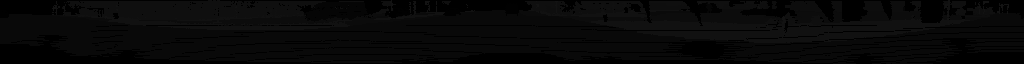

In [ ]:
Image.fromarray(mask)

Recorte da matriz de reflectância

In [ ]:
#|eval: false
input[:,:,0][20:25, 500:505]

array([[0.23999999, 0.19      , 0.30000001, 0.17      , 0.16      ],
       [0.34      , 0.34      , 0.18000001, 0.31999999, 0.2       ],
       [0.20999999, 0.30000001, 0.13      , 0.2       , 0.18000001],
       [0.17      , 0.18000001, 0.30000001, 0.2       , 0.2       ],
       [0.19      , 0.23      , 0.20999999, 0.20999999, 0.2       ]])

Recorte da matriz de profundidade

In [ ]:
#|eval: false
input[:,:,1][20:25, 500:505]

array([[15.4601324 , 15.46342901, 15.4666961 , 15.45551485, 15.46282257],
       [14.24523417, 14.242121  , 14.24970282, 14.24288027, 14.25246816],
       [13.67091129, 13.68519774, 13.65380744, 13.67322429, 13.65384548],
       [12.65182511, 12.65869023, 12.64476904, 12.64353768, 12.65325494],
       [12.1421845 , 12.15425226, 12.15474774, 12.14426884, 12.15679507]])

Exibindo valores unicos da máscara

In [ ]:
#|eval: false
np.unique(mask)

array([ 0,  1,  5,  6,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

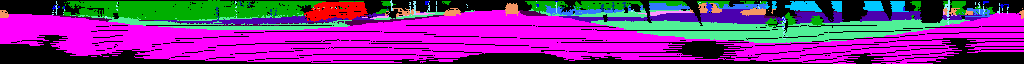

In [ ]:
#|eval: false
mask = np.vectorize(data.learning_map_inv.get)(mask)
mask = sp.colored_matrix_with_label(mask)
mask_img = Image.fromarray(mask)
mask_img

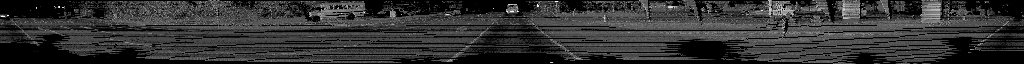

In [ ]:
#|eval: false
reflec = input[:,:,0]
reflec = reflec * 255
reflec = reflec.astype(np.uint8)
reflec_img = Image.fromarray(reflec)
reflec_img

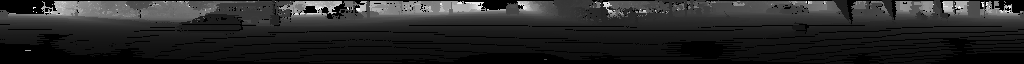

In [ ]:
#|eval: false
depth = input[:,:,1]
depth = ((depth - depth.min()) / (depth.max() - depth.min())) * 255
depth = depth.astype(np.uint8)
depth_img = Image.fromarray(depth)
depth_img